In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('NBA_Dataset.csv')

In [ ]:
df.head()

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768


In [ ]:
df.isnull().sum()

season                 0
player                 0
pos                    0
age                    0
team_id                0
g                      0
gs                     0
mp_per_g               0
fg_per_g               0
fga_per_g              0
fg_pct                63
fg3_per_g              0
fg3a_per_g             0
fg3_pct             2623
fg2_per_g              0
fg2a_per_g             0
fg2_pct              106
efg_pct               63
ft_per_g               0
fta_per_g              0
ft_pct               576
orb_per_g              0
drb_per_g              0
trb_per_g              0
ast_per_g              0
stl_per_g              0
blk_per_g              0
tov_per_g              0
pf_per_g               0
pts_per_g              0
mp                     0
per                    3
ts_pct                55
fg3a_per_fga_pct      63
fta_per_fga_pct       63
orb_pct                3
drb_pct                3
trb_pct                3
ast_pct                3
stl_pct                3


In [ ]:
df['fg_pct'] = df['fg_pct'].fillna(0)

In [ ]:
df[df['fg3_pct'].isnull()].groupby('pos').mean()['mp_per_g']

pos
C        14.147832
C-PF     13.660000
PF       12.645799
PF-C     12.877778
PF-SF     7.850000
PG        6.960000
PG-SG     7.400000
SF        9.947475
SF-PF     6.900000
SG        6.148077
SG-PG     5.000000
SG-SF     6.250000
Name: mp_per_g, dtype: float64

In [ ]:
df['fg3_pct'] = df['fg3_pct'].fillna(0)

In [ ]:
no_ft = df[df['ft_pct'].isnull()]

Text(0.5, 1.0, 'Minutes played per game with no free throws')

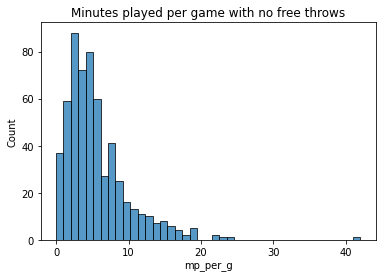

In [ ]:
sns.histplot(data=no_ft,x='mp_per_g')
plt.title('Minutes played per game with no free throws')

In [ ]:
df['ft_pct'] = df['ft_pct'].fillna(0)

In [ ]:
df['efg_pct'] = df['efg_pct'].fillna(0) 

In [ ]:
df['ft_pct'] = df['ft_pct'].fillna(0)

In [ ]:
df['per'] = df['per'].fillna(0)

In [ ]:
df['ts_pct'] = df['ts_pct'].fillna(0) 

In [ ]:
df = df.fillna(0)

In [ ]:
bottom20 = df['mp_per_g'].quantile([.1])
bottom20

0.1    7.0
Name: mp_per_g, dtype: float64

In [ ]:
# dropping bottom 10% of minutes played//game (7 minutes per game)

df = df[df['mp_per_g'] > 7]

In [ ]:
df.columns

Index(['season', 'player', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws',
       'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'award_share', 'mov',
       'mov_adj', 'win_loss_pct'],
      dtype='object')

In [ ]:
df[df['fg3a_per_g'] > 10].sort_values('season')

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
14095,2016,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,...,17.9,0.318,10.3,1.6,11.9,9.5,1.000,10.76,10.38,0.890
15616,2019,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,...,9.7,0.199,7.1,-0.5,6.6,5.1,0.173,6.46,6.42,0.695
15699,2019,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,...,15.2,0.254,9.4,1.6,11.0,9.3,0.768,4.77,4.97,0.646
16221,2020,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,...,13.1,0.254,8.1,1.6,9.6,7.3,0.363,2.96,3.13,0.611
16319,2020,Damian Lillard,PG,29,POR,66,66,37.5,9.5,20.4,...,11.6,0.225,8.3,-0.9,7.5,5.9,0.023,-1.15,-0.61,0.473
16667,2021,Stephen Curry,PG,32,GSW,63,63,34.2,10.4,21.7,...,9.0,0.201,8.3,0.4,8.7,5.8,0.449,1.06,1.10,0.542
16770,2021,Buddy Hield,SG,28,SAC,71,71,34.3,5.7,14.0,...,2.2,0.044,1.0,-1.6,-0.6,0.9,0.000,-3.68,-3.45,0.431
16848,2021,Damian Lillard,PG,30,POR,67,67,35.8,9.0,19.9,...,10.4,0.209,7.5,-1.3,6.3,5.0,0.038,1.79,1.80,0.583
17217,2022,Stephen Curry,PG,33,GSW,64,64,34.5,8.4,19.1,...,8.0,0.173,5.4,0.4,5.8,4.4,0.004,5.54,5.52,0.646


In [ ]:
# Defining points per shot column
df['pps_pg'] = ((df['fg2_per_g'] * 2) + (df['fg3_per_g']*3))/df['fga_per_g']

Text(0.5, 0, 'Season (Year)')

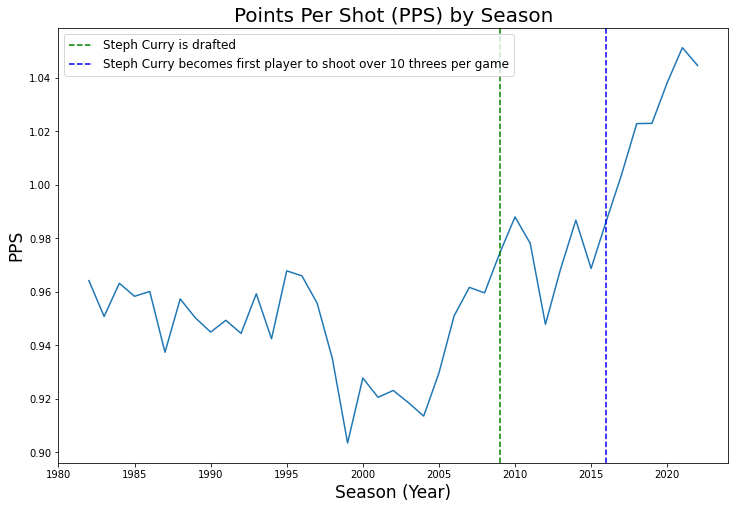

In [ ]:
steph = df.groupby('season')['pps_pg'].mean()
steph = pd.DataFrame(steph)
steph = steph.reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(y=steph['pps_pg'],x=steph['season'])
plt.axvline(x=2009,color='g',linestyle='dashed',label='Steph Curry is drafted')
plt.axvline(x=2016,color='b',linestyle='dashed',label='Steph Curry becomes first player to shoot over 10 threes per game')
plt.legend(fontsize=12)
plt.title('Points Per Shot (PPS) by Season',fontsize=20)
plt.ylabel('PPS',fontsize=17)
plt.xlabel('Season (Year)',fontsize=17)

In [ ]:
def grp_func(metric1,metric2,graph_title='Title'):
  new_df = df.groupby(metric1)[metric2].mean()
  new_df = pd.DataFrame(new_df)
  new_df = new_df.reset_index()
  plt.figure(figsize=(12,8))
  sns.lineplot(y=new_df[metric2],x=new_df[metric1])
  plt.axvline(x=2009,color='g',linestyle='dashed',label='Steph Curry is drafted')
  plt.axvline(x=2016,color='b',linestyle='dashed',label='Steph Curry becomes first player to shoot over 10 threes per game')
  plt.legend(fontsize=12)
  plt.title(f'{metric2} per Player per Game by {metric1}',fontsize=20)
  plt.ylabel(metric2,fontsize=17)
  plt.xlabel(metric1,fontsize=17)

Text(0, 0.5, '3PA Per Game')

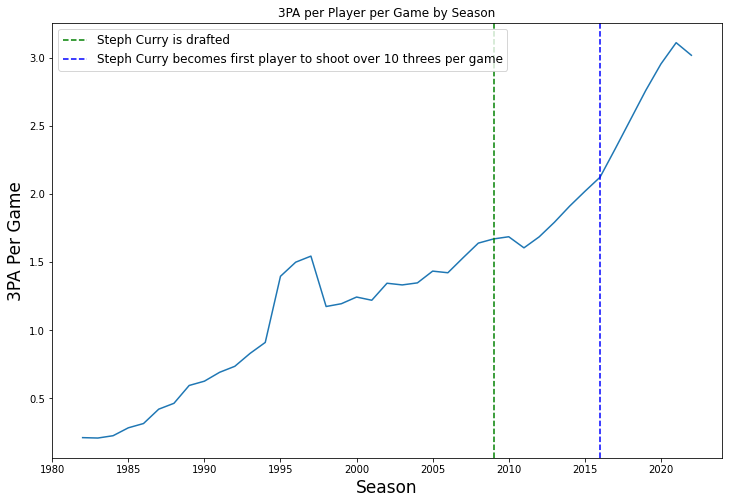

In [ ]:
grp_func('season','fg3a_per_g','3PA by Season')
plt.title('3PA per Player per Game by Season')
plt.xlabel('Season')
plt.ylabel('3PA Per Game')

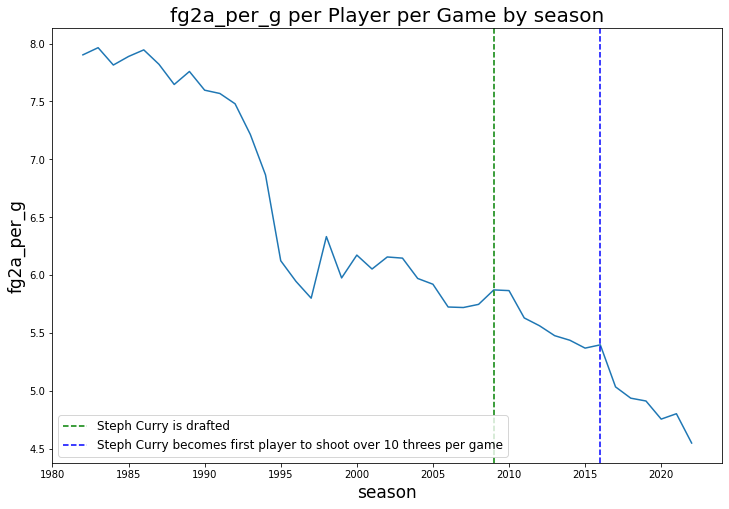

In [ ]:
grp_func('season','fg2a_per_g')

In [ ]:
decade = []

for year in df['season']:
  if year < 1990:
    decade.append('1980s')
  elif year < 2000:
    decade.append('1990s')
  elif year < 2010:
    decade.append('2000s')
  elif year < 2020:
    decade.append('2010s')
  else:
    decade.append('2020s')

In [ ]:
df['decade'] = decade

<AxesSubplot:xlabel='decade'>

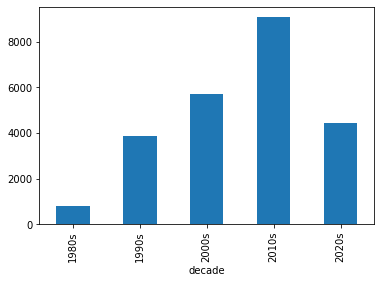

In [ ]:
df.groupby('decade')['fg3a_per_g'].sum().plot(kind='bar')

In [ ]:
by_dec = df.groupby('decade')['fg3a_per_g'].sum()

In [ ]:
print('The 2000\'s saw a', round(100*(by_dec[2] / by_dec[1]),1),'% increase in 3 point attempts compared to the 1990\'s')

The 2000's saw a 147.3 % increase in 3 point attempts compared to the 1990's


In [ ]:
print('The 2010\'s saw a', round(100*(by_dec[3] / by_dec[2]),1),'% increase in 3 point attempts compared to the 2000\'s')

The 2010's saw a 158.7 % increase in 3 point attempts compared to the 2000's


In [ ]:
print('The total amount of 3 point attempts in the 2020\'s are on track to increase by',round((100*(by_dec[4]*7)/by_dec[3]),2),'% compared to the the 2010s')

The total amount of 3 point attempts in the 2020's are on track to increase by 343.4 % compared to the the 2010s


<AxesSubplot:xlabel='mp_per_g', ylabel='Count'>

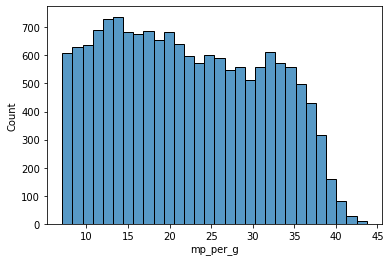

In [ ]:
sns.histplot(data=df,x='mp_per_g')

In [ ]:
pos = pd.DataFrame(df.groupby(['season','pos'])['fg3a_per_g'].mean())
pos = pos.reset_index()

In [ ]:
uniq_pos = df['pos'].unique()
uniq_pos = uniq_pos[:5]

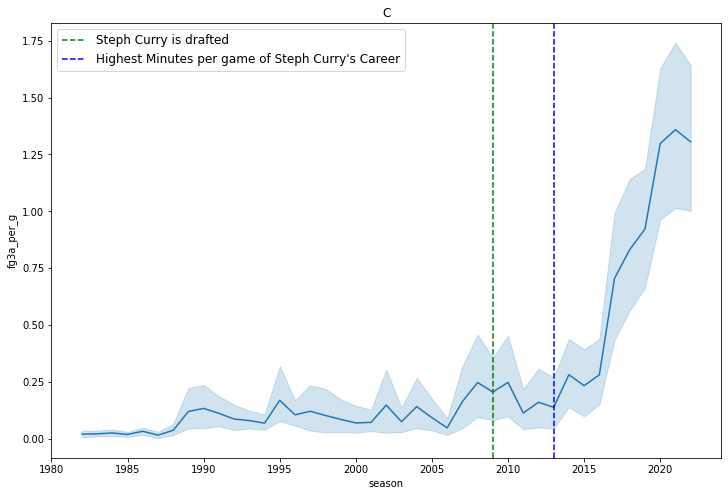

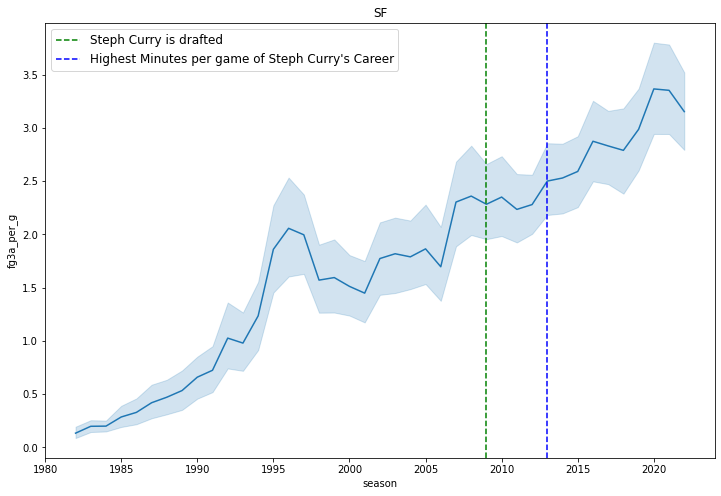

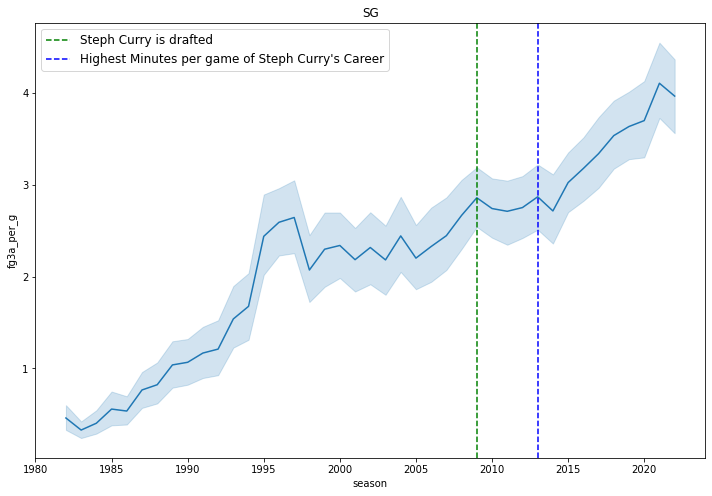

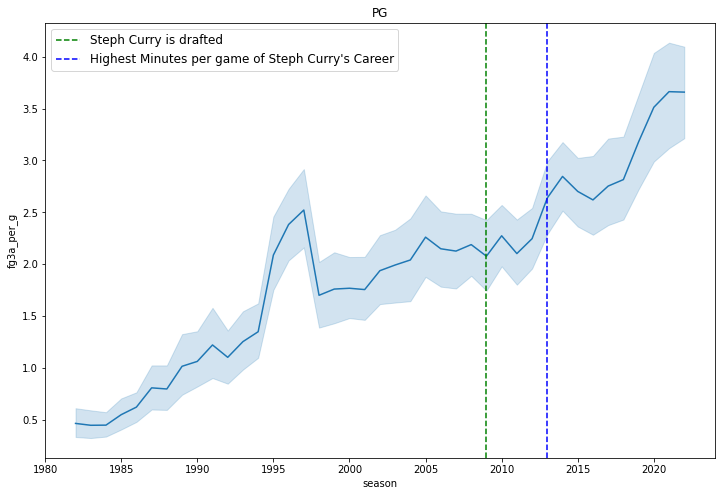

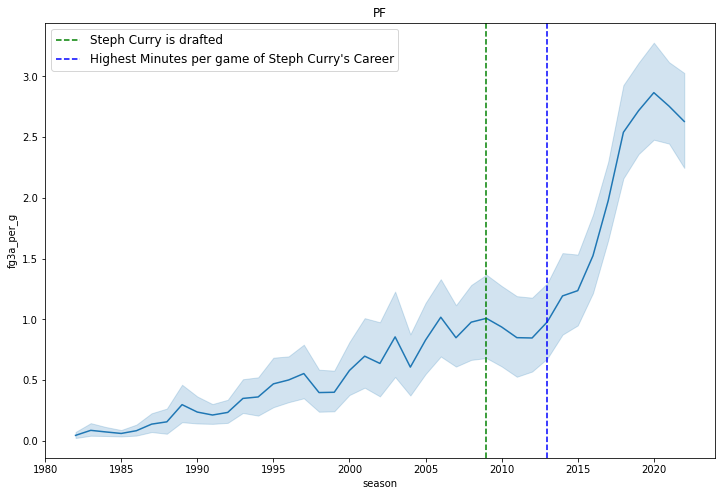

In [ ]:
for position in uniq_pos:
    data = df[df['pos'] == position]
    plt.figure(figsize=(12,8))
    sns.lineplot(data=data,x='season',y='fg3a_per_g')
    plt.axvline(x=2009,color='g',linestyle='dashed',label='Steph Curry is drafted')
    plt.axvline(x=2013,color='b',linestyle='dashed',label='Highest Minutes per game of Steph Curry\'s Career')
    plt.legend(fontsize=12)
    # Show/save figure as desired.
    plt.title(position)
    plt.show()

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00


In [ ]:
pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 3.0 MB/s eta 0:00:00


In [ ]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()
import plotly.graph_objects as go

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
    <script src="/static/components/requirejs/require.js"></script>
      requirejs.config({
        paths: {
          base: '/static/base',
          plotly: '/https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
        },
      });
    </script>
    '''))

In [ ]:
teams = df['team_id'].unique()

In [ ]:
for team in teams:
  frame = df[df['team_id'] == team]
  frame = frame[['season','pts_per_g']]
  frame = frame.groupby('season')['pts_per_g'].sum()
  configure_plotly_browser_state()
  init_notebook_mode(connected=True)
  frame.iplot(title=team)

In [ ]:
top15 = df['pts_per_g'].quantile([.85])
top_15_ppg = np.array(top15)[0]

In [ ]:
players = df[(df['season'] > 2007) & (df['pts_per_g'] > top_15_ppg)]

In [ ]:
players = players[['player','season','fg3a_per_g','mp_per_g']]

In [ ]:
play = pd.DataFrame(players['player'].value_counts())

In [ ]:
play = play[play['player']>8]
play = play.reset_index()



In [ ]:
play = np.array(play['index'])

<ipython-input-49-e90ef796b213>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



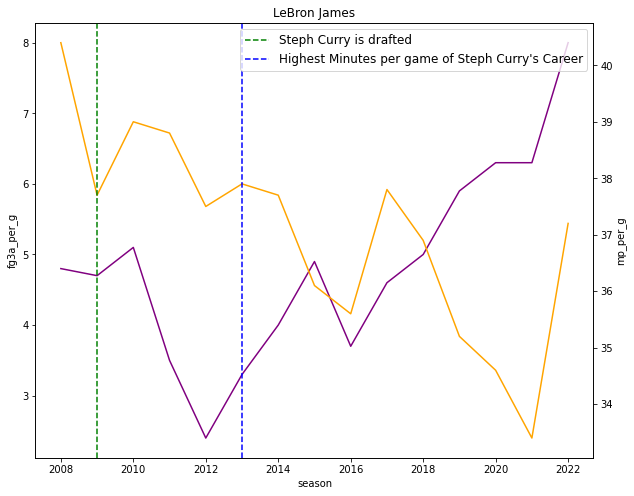

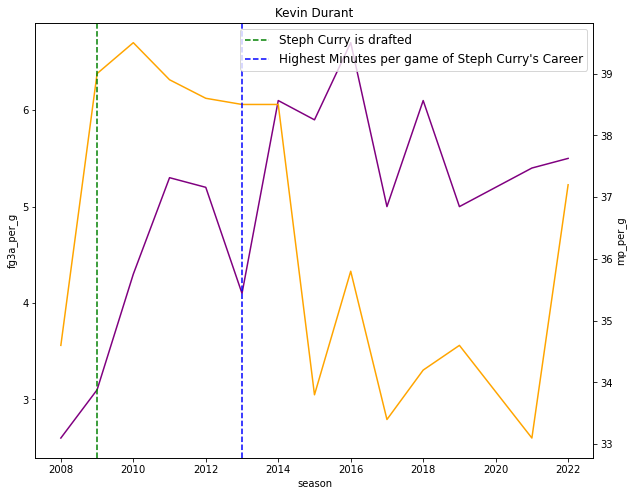

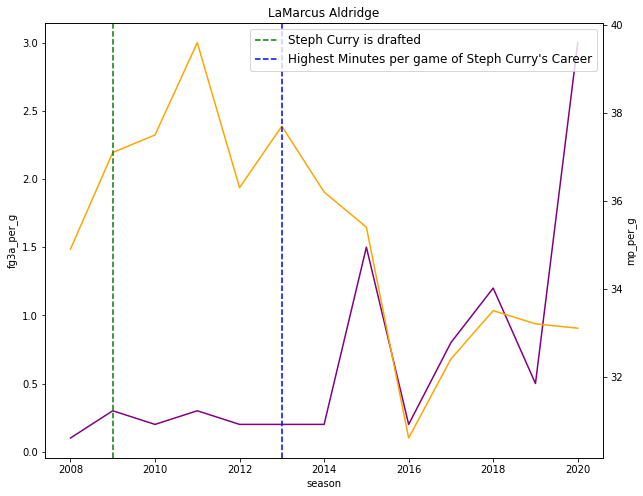

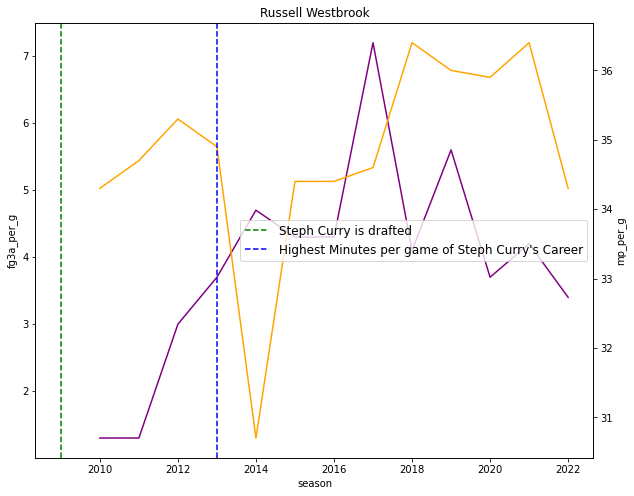

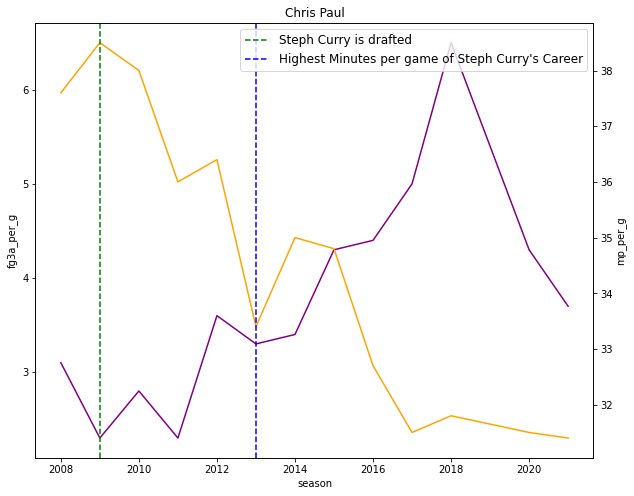

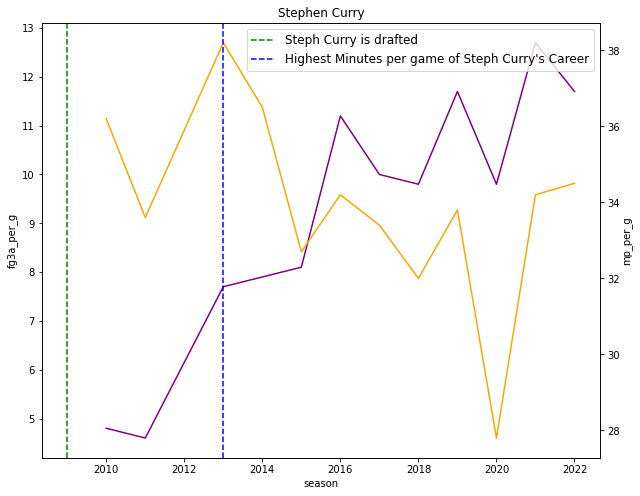

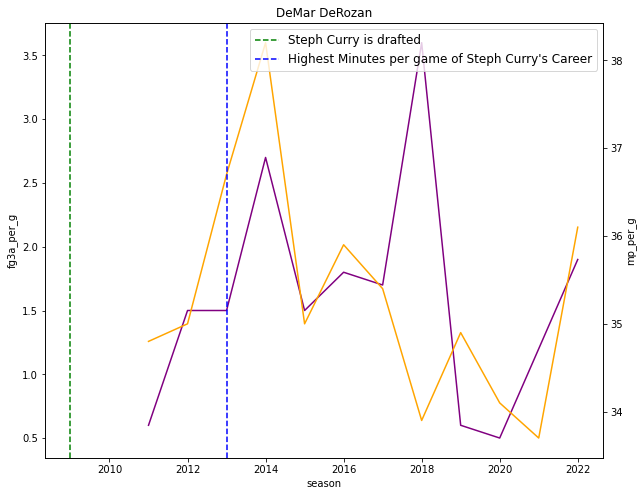

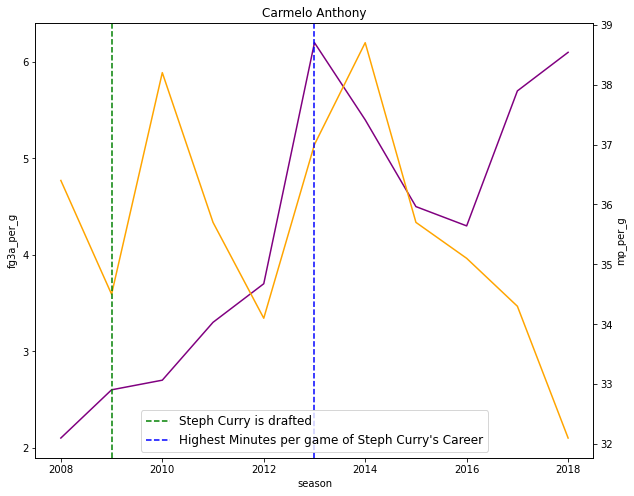

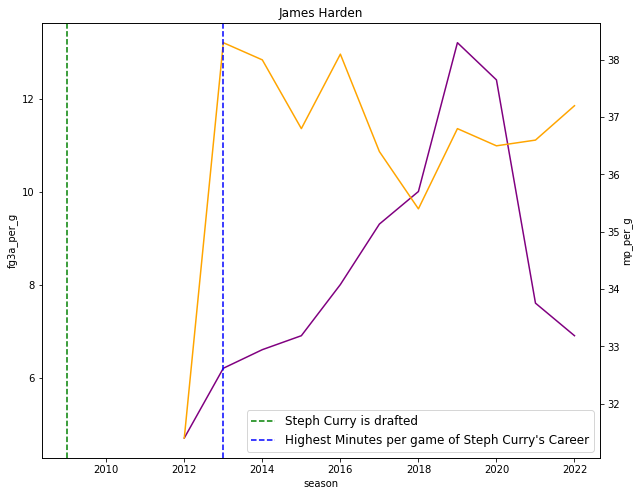

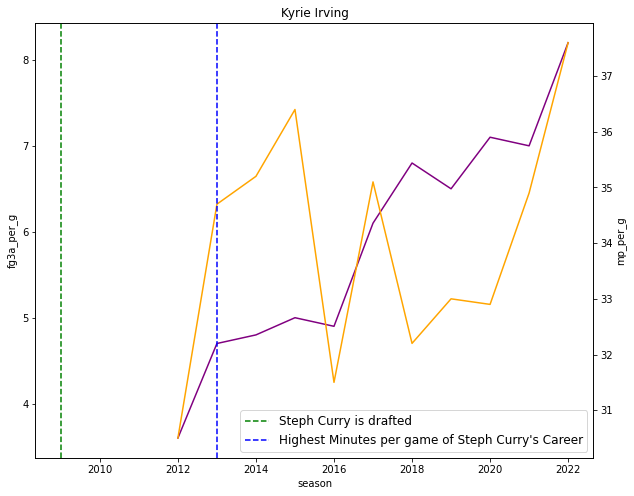

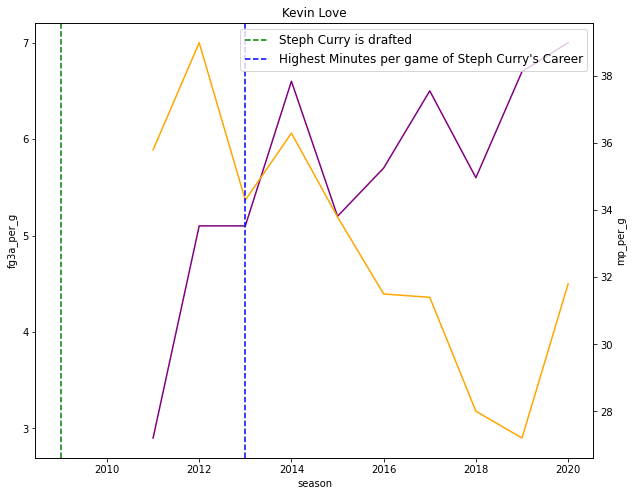

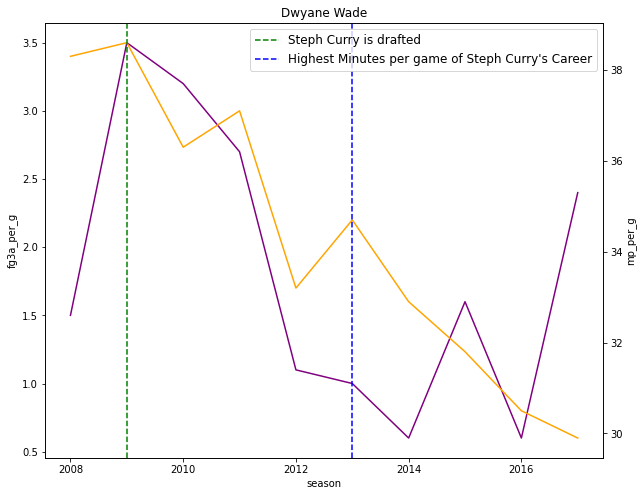

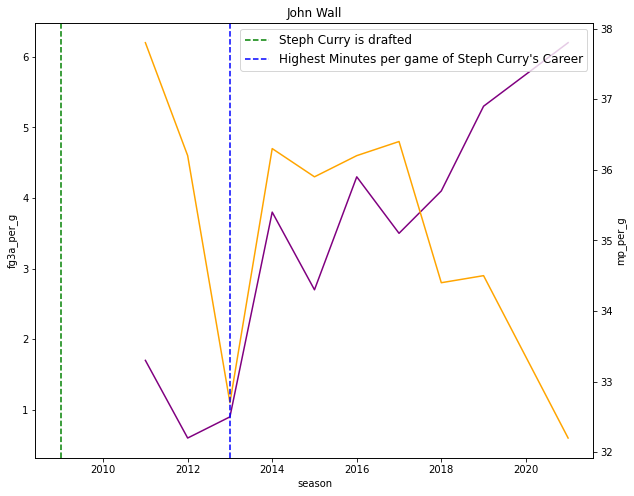

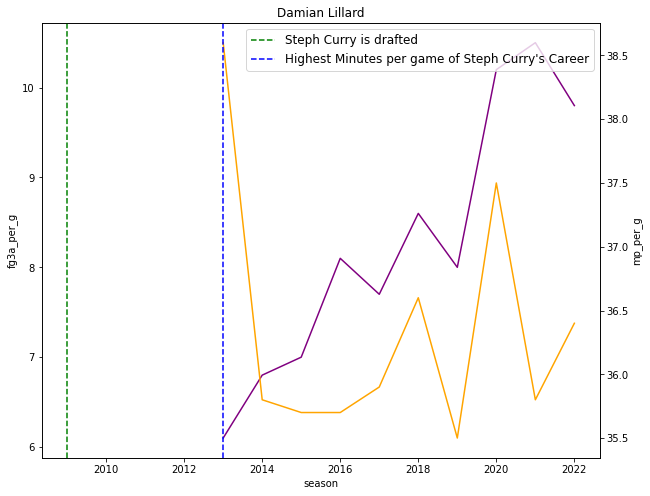

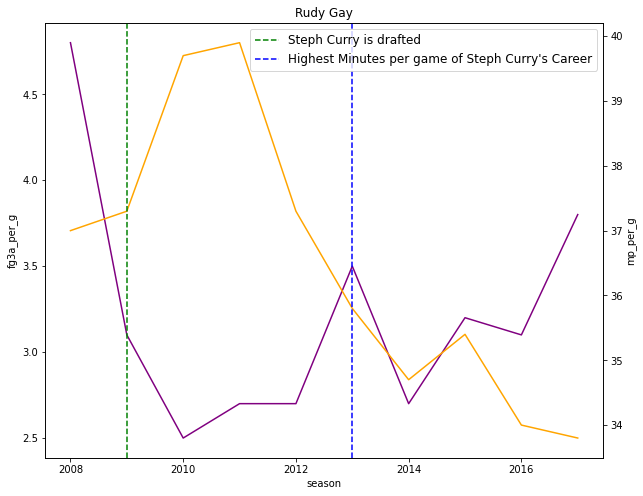

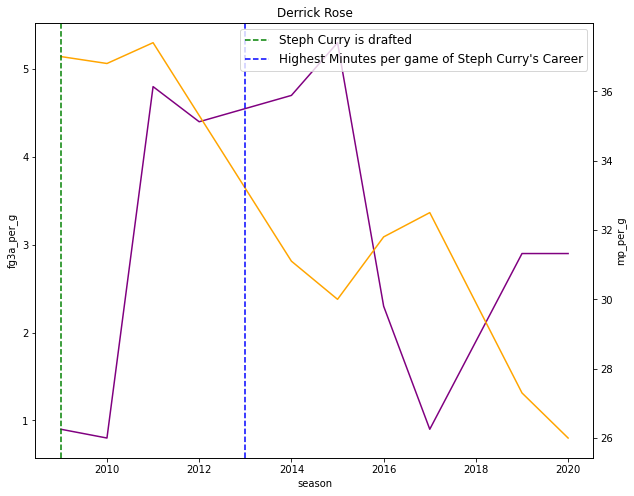

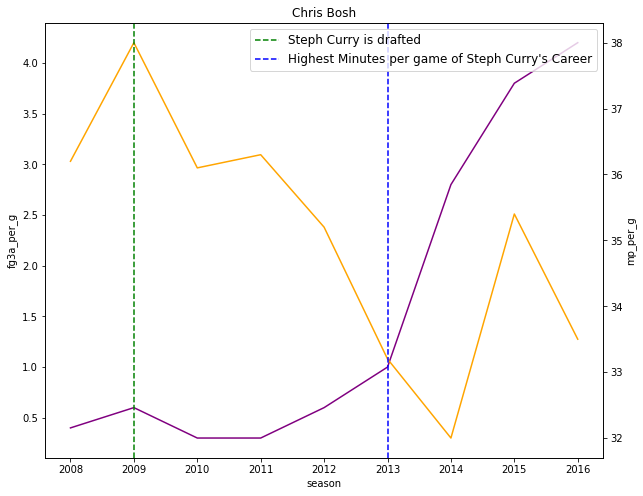

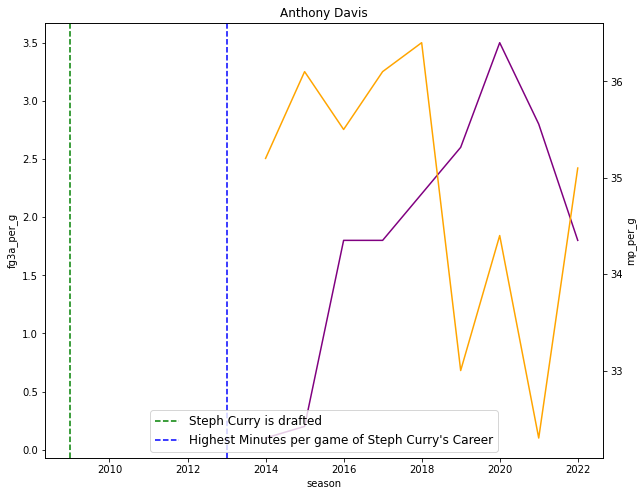

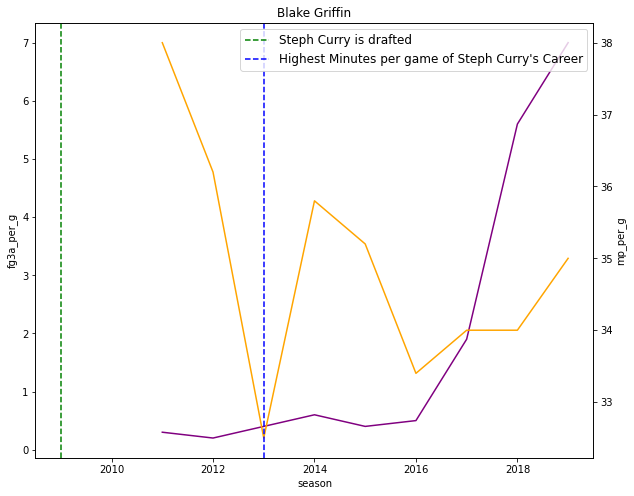

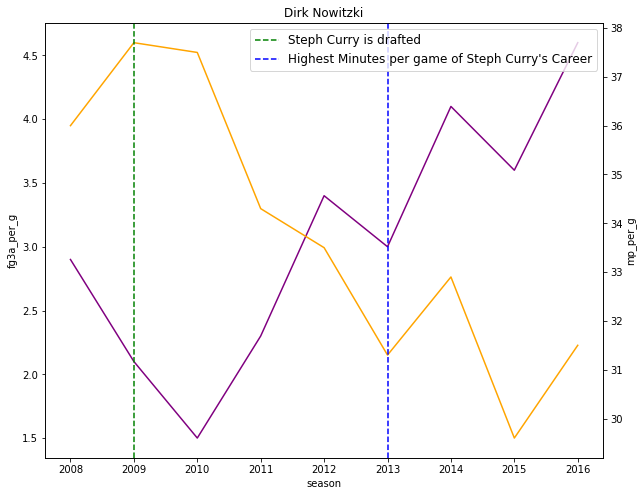

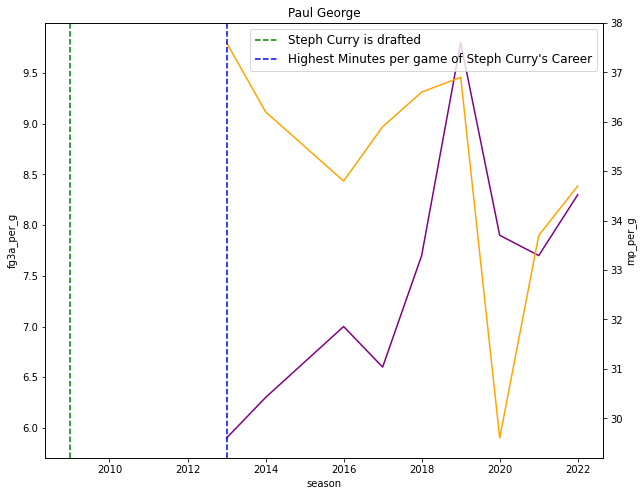

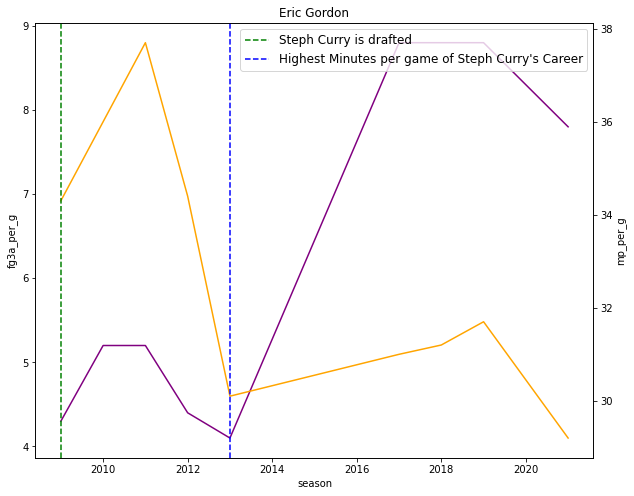

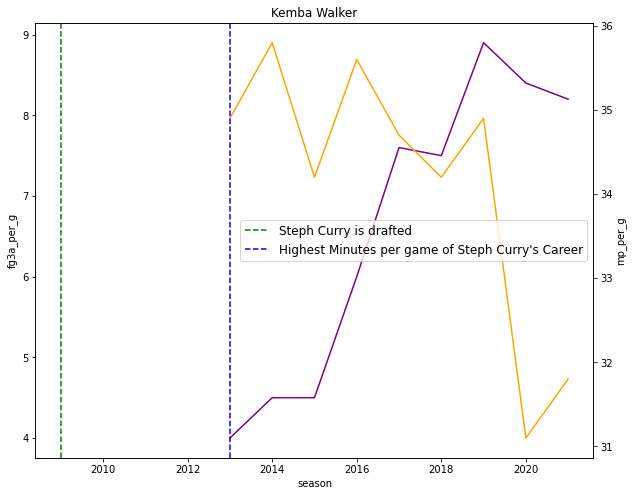

In [ ]:
for player in play:
    id = players[players['player']==player]
    plt.figure(figsize=(10,8))
    plt.style.context('fivethirtyeight')
    sns.lineplot(data = id,x='season',y='fg3a_per_g',color='purple',legend=True)
    ax2 = plt.twinx()
    sns.lineplot(data = id,x='season',y='mp_per_g',color = 'orange',legend=True)
    plt.axvline(x=2009,color='g',linestyle='dashed',label='Steph Curry is drafted')
    plt.axvline(x=2013,color='b',linestyle='dashed',label='Highest Minutes per game of Steph Curry\'s Career')
    plt.legend()
    plt.legend(fontsize=12)
    plt.title(player)

In [ ]:
test = pd.DataFrame()

for player in play:
    test = test.append(players[players['player']==player])

In [ ]:
test.to_csv('prominant_players.csv',index=False)

In [ ]:
id['player'].value_counts()

Kemba Walker    9
Name: player, dtype: int64

In [ ]:
players = df[(df['season'] > 2007) & (df['pts_per_g'] > top_15_ppg)]

In [ ]:
test

,player,season,fg3a_per_g,mp_per_g
10490,LeBron James,2008,4.8,40.4
10938,LeBron James,2009,4.7,37.7
11397,LeBron James,2010,5.1,39.0
11843,LeBron James,2011,3.5,38.8
12303,LeBron James,2012,2.4,37.5
...,...,...,...,...
14918,Kemba Walker,2017,7.6,34.7
15450,Kemba Walker,2018,7.5,34.2
15989,Kemba Walker,2019,8.9,34.9
16517,Kemba Walker,2020,8.4,31.1


In [ ]:
pip install dash==1.18.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 58.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.2/188.2 KB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 30.7 MB/s eta 0:00:00
  Created wheel for dash: filename=dash-1.18.0-py3-none-any.whl size=83695 sha256=7f904c0695d12030397b42edaa857717edcc92a4d87c4ca493bc199a49c8fce8
  Stored in directory: /root/.cache/pip/wheels/10/27/3d/3432718b5d2604

In [ ]:
pip install dash_html_components

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input

app = dash.Dash(__name__)

In [ ]:
dropdown_options = [{'label': player, 'value': player} for player in test['player'].unique()]

In [ ]:
fig = px.line(test, x='season', y='fg3a_per_g', color='player')

In [ ]:
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Create the dashboard layout with dropdown
app.layout = html.Div([
    html.Label('Select a player'),
    dcc.Dropdown(
        id='player-dropdown',
        options=dropdown_options,
        value=test['player'].iloc[0]
    ),
    dcc.Graph(id='3p-per-game-chart', figure=fig)
])

# Define the callback for the dropdown
@app.callback(
    Output('3p-per-game-chart', 'figure'),
    [Input('player-dropdown', 'value')]
)
def update_chart(player):
    filtered_data = test[test['player'] == player]
    fig = px.line(filtered_data, x='season', y='fg3a_per_g')
    fig.update_layout(title=f'{player} - Career 3P per game')
    return fig

app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8050
INFO:werkzeug:Press CTRL+C to quit
